Notebook to pull & organize the data, make plots characterizing sample.

Questions to deal with here:
- what is sample for Paper 1?
- how about Paper 2?


Data to consider:
- Original Kepler (1-min esp.) data, months to 4-yr baseline
- TESS Cycle 2 revisit of Kepler field (2-min data), 10-yr baseline
- TESS, months to ~1-yr baseline (per Cycle in CVZ), 3-yr baseline (between Cycles)
    - soon: 5-yr baseline
    
Current plan is:
- **Paper 1: Stars in Kepler + TESS Cycle 2 + 4**
- **Paper 2: TESS CVZ & multi-Cycle Targets**

In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import lightkurve as lk
from astropy.table import Table

In [35]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [12]:
# might need the KIC2TIC
k2t = pd.read_csv('/Users/james/Dropbox/research_projects/kic2tic/KIC2TIC.csv')
k2t.columns
k2t.shape

(199421, 2)

- want to focus on Kepler flare stars observed by TESS... so what is our ultimate source for these?
    - homogeneous flare catalog in TESS (e.g. Spencer's work), x-match to KIC
    - best group of flare stars in Kepler (me + others), x-match to TIC  
- maybe easiest to start with option (1), and if ~10 good targets to show up (or if GJ 1243 doesnt), then let's circle back

In [23]:
# The summary list of 7260 flare star candidates... 
# sp = pd.read_csv('/Users/james/Dropbox/docs/proposals/TESS_Cycle5/spencer_sample_2021/allsky_flare_targets.csv')
# PROBLEM: this wasnt updated to final run from Spencer's code... e.g. no GJ 1243!

# so, switch to 33k individual flare events
sp = pd.read_csv('/Users/james/Dropbox/docs/proposals/TESS_Cycle5/spencer_sample_2021/allsky_flare_events_all.csv')
# sp.columns
sp['TIC'].unique().shape

(8592,)

In [26]:
spU = sp.groupby('TIC').count()

In [27]:
spK = spU.merge(k2t, left_on='TIC', right_on='TIC')
spK.shape
# OK, that's 28 stars to start with...

(34, 4)

In [36]:
# 18 stars that Spencer said has >1 flare in TESS 2-min data... this is a lower limit to be sure
m1 = (spK['ed'] > 1)
sum(m1)

18

In [39]:
spK[m1]

,TIC,ed,ed_err,KIC
0,26584043.0,2,2,11244501
1,27236187.0,2,2,11143395
3,48504458.0,2,2,11495571
6,122136861.0,2,2,6117602
8,123229811.0,2,2,8408875
13,159047957.0,2,2,8682921
14,159721038.0,3,3,8429280
15,159761686.0,3,3,9153754
16,164458193.0,3,3,9201463
18,164463430.0,3,3,7505473


In [181]:
# let's step thru them all w/ lightkurve, see which have Kepler 1-min data
# (we can use Kepler 30-min too, but its nice to start w/ 1-min)

Nshort = np.zeros(sum(m1))
Nlong = np.zeros(sum(m1))
Ntess = np.zeros(sum(m1))
for k in range(sum(m1)):
    Nshort[k] = len(lk.search_lightcurve(str(spK['KIC'][m1].values[k]), mission='Kepler', exptime=60))
    Nlong[k] = len(lk.search_lightcurve(str(spK['KIC'][m1].values[k]), mission='Kepler', exptime=1800))
    Ntess[k] = len(lk.search_lightcurve(str(spK['KIC'][m1].values[k]), mission='TESS', exptime=120))

In [173]:
Nshort

array([ 1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., 11.,  9.,  9.])

In [174]:
Nlong

array([18.,  1., 15., 17.,  4., 18., 18.,  4., 17.,  4., 16., 17.,  4.,
        8., 18., 15., 39., 39.])

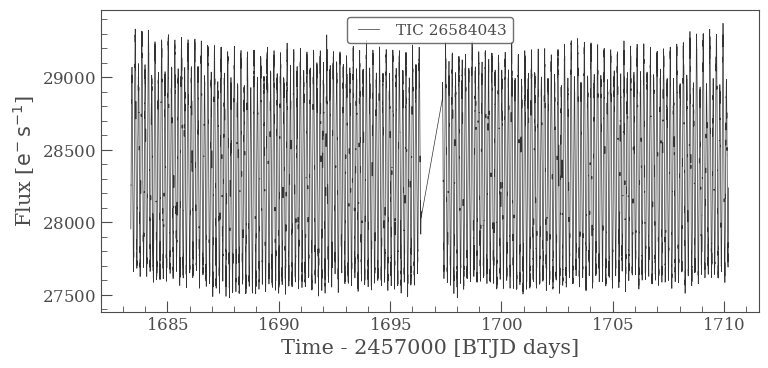

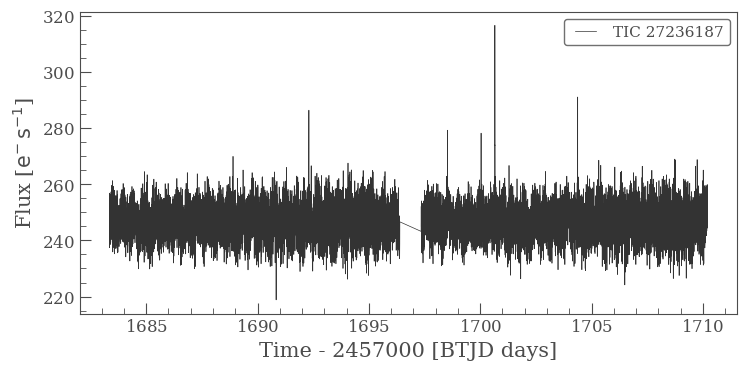

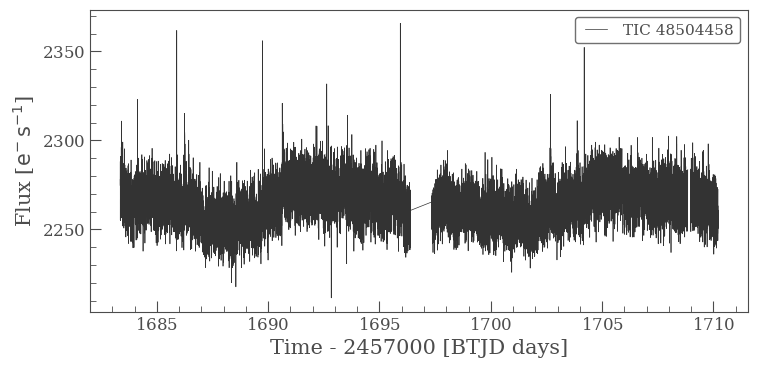

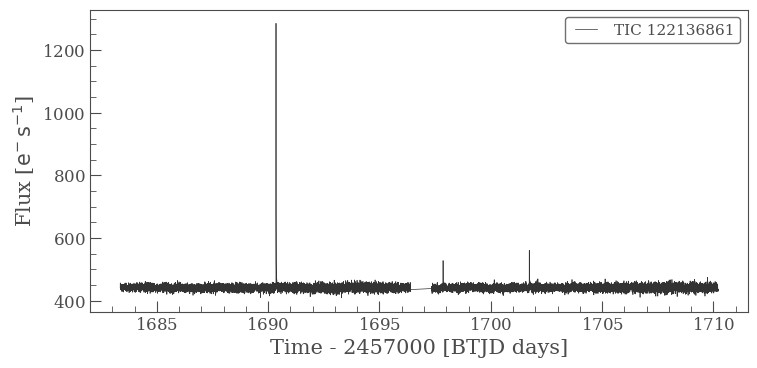

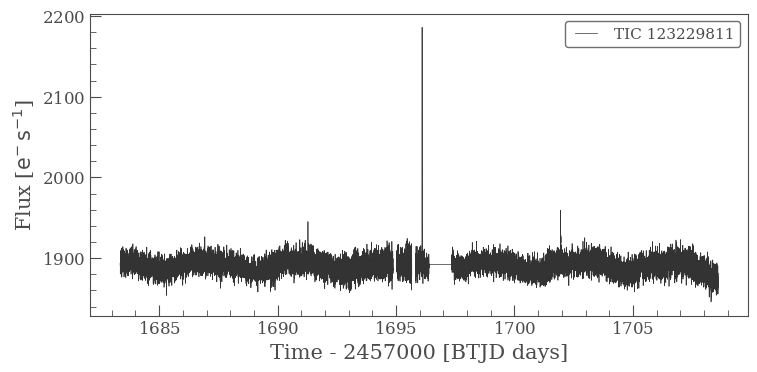

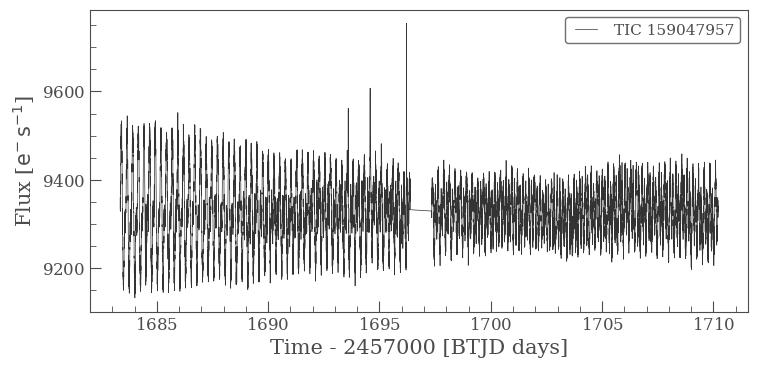

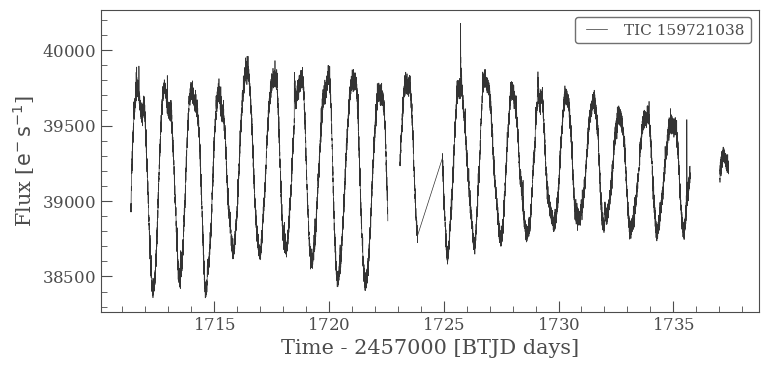

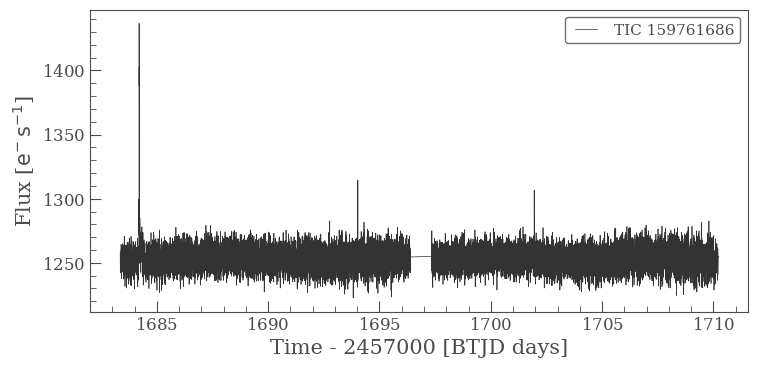

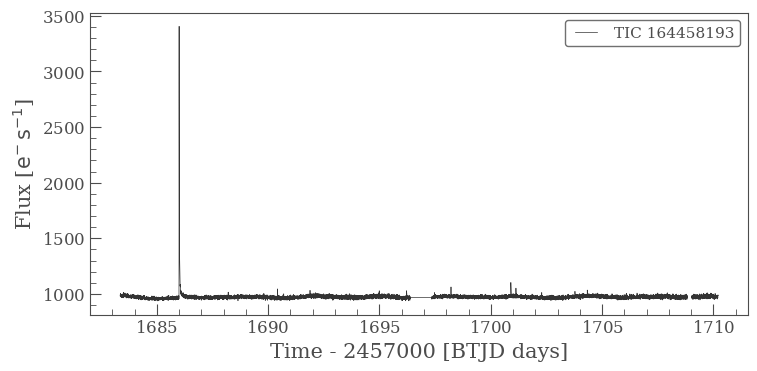

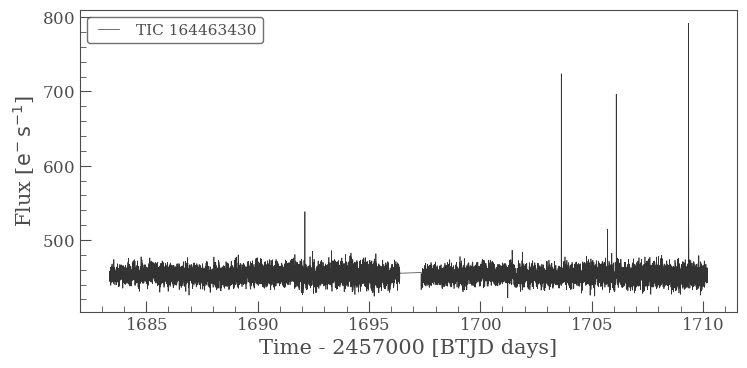

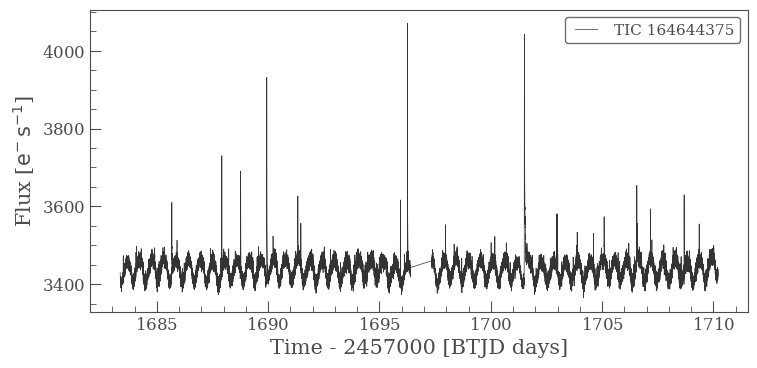

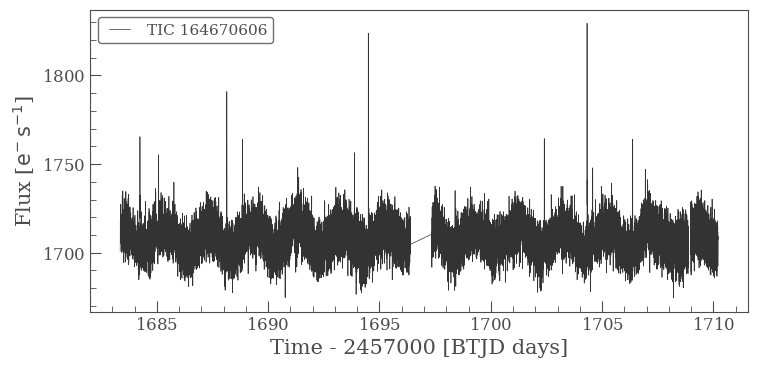

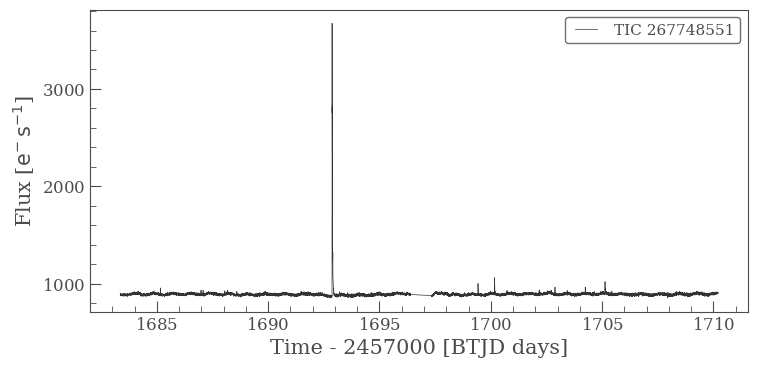

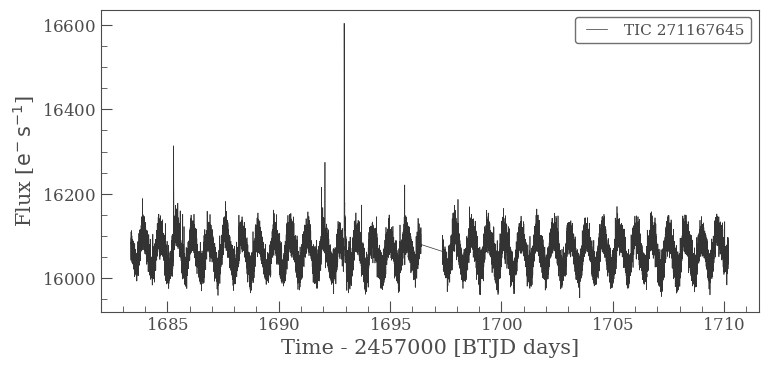

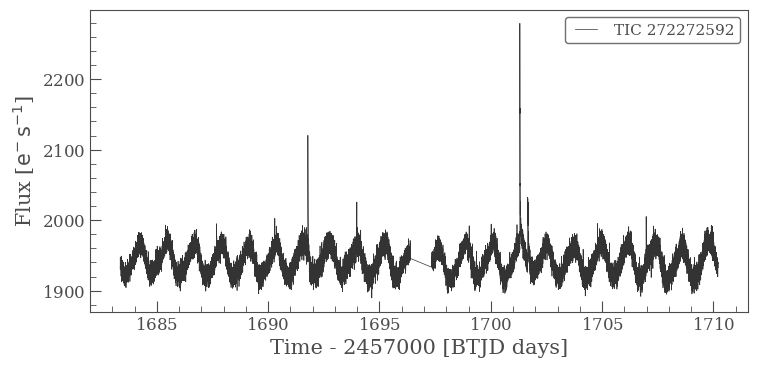

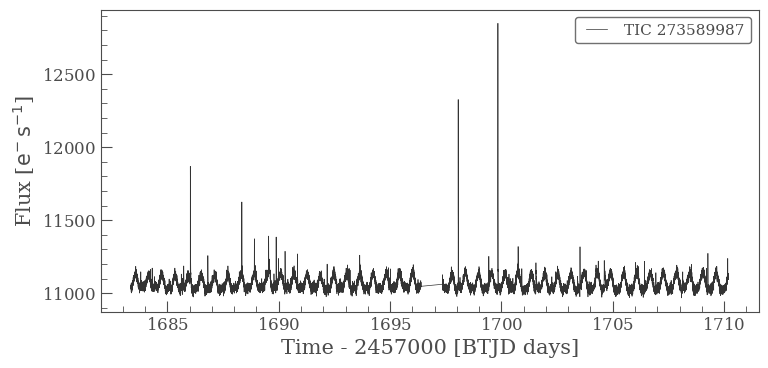

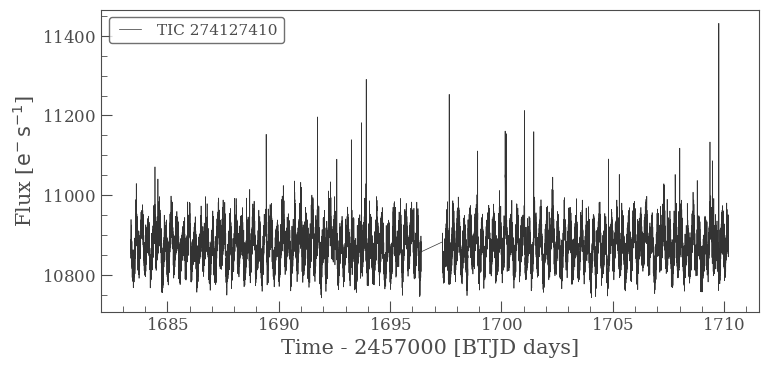

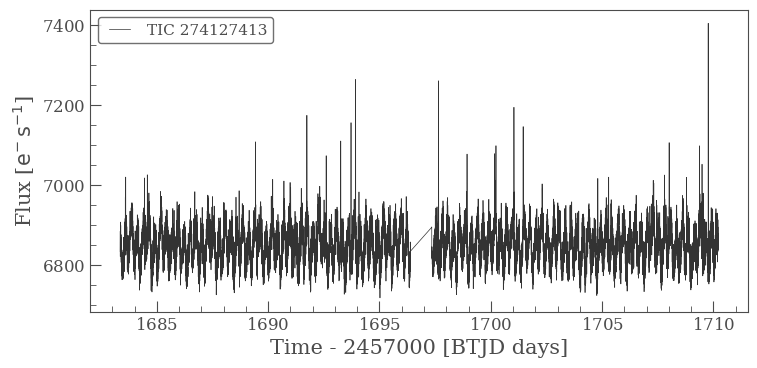

In [170]:
# lets plot TESS data for these 18 stars, see whats what
for k in range(sum(m1)):    
    lc = lk.search_lightcurve(str(spK['KIC'][m1].values[k]), mission='TESS', exptime=120)[0].download()
    lc.plot()

In [182]:
# lets drop that first EB (it might have flares, but why fight it) (the first target)
#     and GJ 1243, GJ 1245A, GJ 1245B (the last 3 targets)

FS1 = pd.DataFrame(data={'KIC':spK['KIC'][m1][1:-3], 
                         'TIC':spK['TIC'].astype('int')[m1][1:-3],
                         'Nfl':spK['ed'][m1][1:-3], 
                         'K1min':Nshort[1:-3],'K30min':Nlong[1:-3], 'T2min':Ntess[1:-3]})

FS1.to_csv('flare_sample_step1.csv', index=False, index_label=False)
FS1

,KIC,TIC,Nfl,K1min,K30min,T2min
1,11143395,27236187,2,0.0,1.0,2.0
3,11495571,48504458,2,0.0,15.0,1.0
6,6117602,122136861,2,0.0,17.0,3.0
8,8408875,123229811,2,0.0,4.0,2.0
13,8682921,159047957,2,1.0,18.0,2.0
14,8429280,159721038,3,1.0,18.0,3.0
15,9153754,159761686,3,0.0,4.0,2.0
16,9201463,164458193,3,0.0,17.0,4.0
18,7505473,164463430,3,0.0,4.0,4.0
19,7341653,164644375,11,0.0,16.0,4.0


In [73]:
# to compare, let's try a Kepler flare catalog (not mine)... Yang+2019
# https://iopscience.iop.org/article/10.3847/1538-4365/ab0d28#apjsab0d28t1
y1 = pd.read_table('apjsab0d28t1_mrt.txt', skiprows=25, 
                   names=('KIC', 'Nfl', 'Teff', 'logg', 'Lum', 'Prot', 'r_Prot', 'pnp'), delim_whitespace=True)
y1.shape

(3420, 8)

In [74]:
y1T = y1.merge(k2t, left_on='KIC', right_on='KIC')
y1T.shape

(3412, 9)

In [119]:
m2 = (y1T['Nfl'] > 50)

In [118]:
sum(m2)

1610

In [82]:
Nshort2 = np.zeros(sum(m2))
# Nlong = np.zeros(sum(m1))

for k in range(sum(m2)):
    Nshort2[k] = len(lk.search_lightcurve('TIC'+str(int(y1T['TIC'][m2].values[k])),
                                          mission='TESS', exptime=120))


No data found for target "TIC26540338".
No data found for target "TIC158561255".
No data found for target "TIC159108575".
No data found for target "TIC63214592".
No data found for target "TIC26417678".
No data found for target "TIC158786228".
No data found for target "TIC417678060".
No data found for target "TIC158171905".
No data found for target "TIC158394122".
No data found for target "TIC120893689".
No data found for target "TIC406950619".
No data found for target "TIC159047023".
No data found for target "TIC137756172".
No data found for target "TIC158921588".
No data found for target "TIC270790828".
No data found for target "TIC26540657".
No data found for target "TIC271881466".
No data found for target "TIC159051090".
No data found for target "TIC158834876".
No data found for target "TIC158432884".
No data found for target "TIC121598838".
No data found for target "TIC158217486".
No data found for target "TIC63007068".
No data found for target "TIC164729295".
No data found for tar

No data found for target "TIC275488558".
No data found for target "TIC138890198".
No data found for target "TIC399821806".
No data found for target "TIC158722156".
No data found for target "TIC273132107".
No data found for target "TIC137097151".
No data found for target "TIC120822750".
No data found for target "TIC123446751".
No data found for target "TIC406948051".
No data found for target "TIC26749607".
No data found for target "TIC164529739".
No data found for target "TIC158423632".
No data found for target "TIC158551332".
No data found for target "TIC270858309".
No data found for target "TIC63373198".
No data found for target "TIC63204788".
No data found for target "TIC137636865".
No data found for target "TIC122607738".
No data found for target "TIC63122370".
No data found for target "TIC164889852".
No data found for target "TIC158278894".
No data found for target "TIC159223476".
No data found for target "TIC159581594".
No data found for target "TIC137148951".
No data found for ta

No data found for target "TIC272599632".
No data found for target "TIC138573309".
No data found for target "TIC169466792".
No data found for target "TIC170652655".
No data found for target "TIC271047516".
No data found for target "TIC159450570".
No data found for target "TIC159387244".
No data found for target "TIC424868030".
No data found for target "TIC137971032".
No data found for target "TIC137901232".
No data found for target "TIC138429553".
No data found for target "TIC272074129".
No data found for target "TIC406948169".
No data found for target "TIC416527256".
No data found for target "TIC27187894".
No data found for target "TIC122293511".
No data found for target "TIC164677934".
No data found for target "TIC26412913".
No data found for target "TIC120819820".
No data found for target "TIC158168835".
No data found for target "TIC275573704".
No data found for target "TIC159761277".
No data found for target "TIC120103356".
No data found for target "TIC239227406".
No data found for 

In [114]:
sum(Nshort2 > 1)

79

In [121]:
y1T[m2].loc[Nshort2 > 1]['KIC'].values

array([ 8935655,  9201463,  2692704, 11147271,  7350067,  4142890,
        4758595,  8507979, 11560431,  6129451,  5342558,  6117602,
       10666510,  7692454,  3103752, 11925804,  5962956,  4355503,
       11918550,  3934090,  8607728, 10452252,  2300039,  6611875,
        8873448,  6530792,  8873450,  6290811,  2557669,  2834637,
        4067894, 10920281,  3109825,  4921143,  5966921,  6370174,
        1872885,  1873543,  6871896,  9203794, 10736489,  2692708,
        3831911,  3323808,  7449695,   892376,  5016904, 11872364,
        4544623,  8565204,  2834564,  9659036,  3454793,  6184894,
        2164791, 10665619,  3646734, 11092783,  5791720, 10459987,
        6610837,  9474589,  2832720,  9333505,  8451881,  4662431,
        3640527,  5709193,  5710376,  3935499,  4930560,  2577743,
        8822421, 10068482,  7341653,  4841888,  9153754,  3940372,
        5951140])

In [122]:
y1T[(y1T['KIC'] == 9726699)]

,KIC,Nfl,Teff,logg,Lum,Prot,r_Prot,pnp,TIC
985,9726699,46,3150,5.28,1.740000e-07,0.59,This_Work,np,273589987


In [105]:
m3 = (y1T['Nfl'] <= 50) & (y1T['Nfl'] > 20)
print(sum(m3))

Nshort3 = np.zeros(sum(m3))

for k in range(sum(m3)):
    Nshort3[k] = len(lk.search_lightcurve('TIC'+str(int(y1T['TIC'][m3].values[k])),
                                          mission='TESS', exptime=120))


678


No data found for target "TIC122507339".
No data found for target "TIC138478796".
No data found for target "TIC169815270".
No data found for target "TIC120104528".
No data found for target "TIC270705036".
No data found for target "TIC164677576".
No data found for target "TIC159387921".
No data found for target "TIC159174756".
No data found for target "TIC138302176".
No data found for target "TIC138296346".
No data found for target "TIC158387678".
No data found for target "TIC159309206".
No data found for target "TIC159650643".
No data found for target "TIC164725370".
No data found for target "TIC158787568".
No data found for target "TIC274200652".
No data found for target "TIC417659364".
No data found for target "TIC27773856".
No data found for target "TIC164552724".
No data found for target "TIC123445459".
No data found for target "TIC164557603".
No data found for target "TIC121660022".
No data found for target "TIC159573644".
No data found for target "TIC271538576".
No data found for

No data found for target "TIC138216657".
No data found for target "TIC121084823".
No data found for target "TIC137218593".
No data found for target "TIC122447388".
No data found for target "TIC169559929".
No data found for target "TIC121464217".
No data found for target "TIC121112989".
No data found for target "TIC184562778".
No data found for target "TIC270948662".
No data found for target "TIC158277485".
No data found for target "TIC352010764".
No data found for target "TIC123450757".
No data found for target "TIC164460209".
No data found for target "TIC239287851".
No data found for target "TIC26597071".
No data found for target "TIC26817896".
No data found for target "TIC299154648".
No data found for target "TIC267670939".
No data found for target "TIC137150790".
No data found for target "TIC122450475".
No data found for target "TIC378012530".
No data found for target "TIC138422949".
No data found for target "TIC138434352".
No data found for target "TIC121942194".
No data found for 

In [106]:
sum(Nshort3 > 1)

46

In [107]:
sum(Nshort2 > 1) + sum(Nshort3 > 1)

125

In [127]:
# need to combine these arrays to get the initial indexes for y1T where both are good
fcat0 = pd.concat([y1T[m2].loc[Nshort2 > 1],
                   y1T[m3].loc[Nshort3 > 1]
                  ])

In [140]:
# sum(sl.table['exptime'] == 1800)
len(sl)

17

In [141]:
# go thru this 125 sources, count Kepler short/long data also
Nshort = np.zeros(len(fcat0))
Nlong = np.zeros(len(fcat0))

for k in range(len(fcat0)):
    sl = lk.search_lightcurve(str(fcat['KIC'].values[k]), mission='Kepler')
    Nshort[k] = sum(sl.table['exptime'] == 60)
    Nlong[k] = sum(sl.table['exptime'] == 1800)

In [142]:
sum(Nshort > 0)

22

In [143]:
fcat0.loc[Nshort > 0]

,KIC,Nfl,Teff,logg,Lum,Prot,r_Prot,pnp,TIC
28,4758595,325,3572,4.86,9.390000e-08,20.00,Rein2013,np,138893136
43,11560431,304,5367,4.51,6.540000e-08,3.08,MC2014,np,26656591
77,7692454,259,3824,4.68,6.100000e-08,16.69,MC2014,np,271432402
118,4355503,228,3585,4.87,1.770000e-07,5.45,MC2014,np,121785583
138,8607728,216,3351,5.10,2.390000e-08,24.69,This_Work,np,164554410
154,2300039,205,3408,4.92,1.550000e-07,1.71,MC2014,np,122672447
543,2834564,94,3530,4.88,4.780000e-08,21.88,MC2014,np,120963148
591,6184894,88,5388,4.56,1.080000e-07,2.59,Rein2013,np,120105470
661,10459987,79,5145,4.68,8.800000e-09,6.09,MC2014,np,158412633
712,8451881,74,2900,5.28,7.140000e-08,0.71,This_Work,p,274127413


In [160]:
# ditch crowded target (GJ 1245 = KIC 8451881)
# ditch hot star (KIC 11189959)
cuts = ((Nshort > 0) & (fcat0['KIC'] != 8451881) & 
        (fcat0['Teff'] < 6000) & (fcat0['logg'] > 4))


FS = fcat0.loc[cuts]
# save some concrete output file(s) to be looped over in later notebooks
# FS.to_csv('flare_sample_step1yang.csv', index=False, index_label=False)

print(FS.shape)
FS

(18, 9)


,KIC,Nfl,Teff,logg,Lum,Prot,r_Prot,pnp,TIC
28,4758595,325,3572,4.86,9.390000e-08,20.00,Rein2013,np,138893136
43,11560431,304,5367,4.51,6.540000e-08,3.08,MC2014,np,26656591
77,7692454,259,3824,4.68,6.100000e-08,16.69,MC2014,np,271432402
118,4355503,228,3585,4.87,1.770000e-07,5.45,MC2014,np,121785583
138,8607728,216,3351,5.10,2.390000e-08,24.69,This_Work,np,164554410
154,2300039,205,3408,4.92,1.550000e-07,1.71,MC2014,np,122672447
543,2834564,94,3530,4.88,4.780000e-08,21.88,MC2014,np,120963148
591,6184894,88,5388,4.56,1.080000e-07,2.59,Rein2013,np,120105470
661,10459987,79,5145,4.68,8.800000e-09,6.09,MC2014,np,158412633
840,4930560,59,4085,4.67,7.450000e-09,10.37,MC2014,np,138300304


In [164]:
# make some characterization plots of the sample here at Step 1

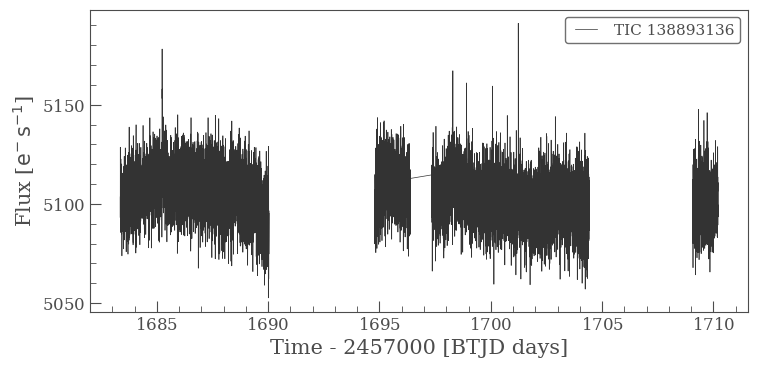

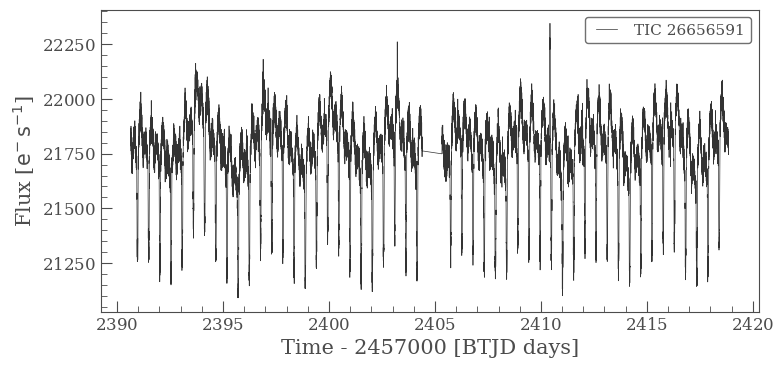

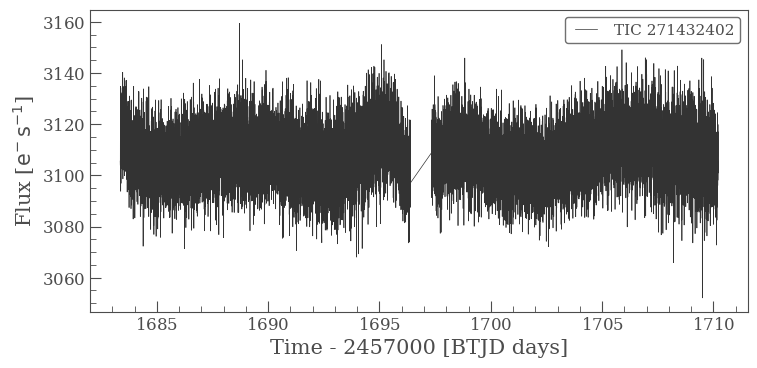

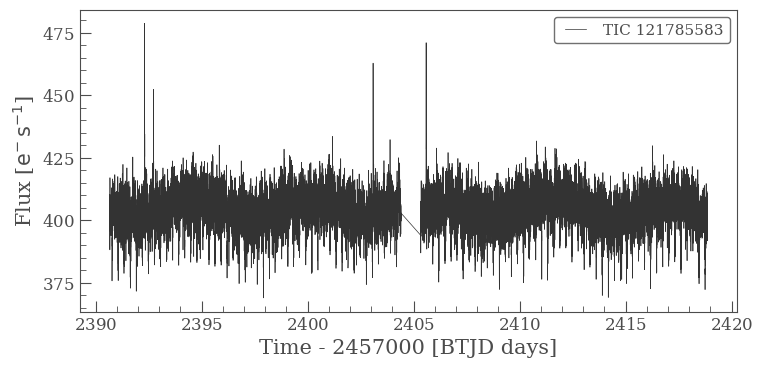

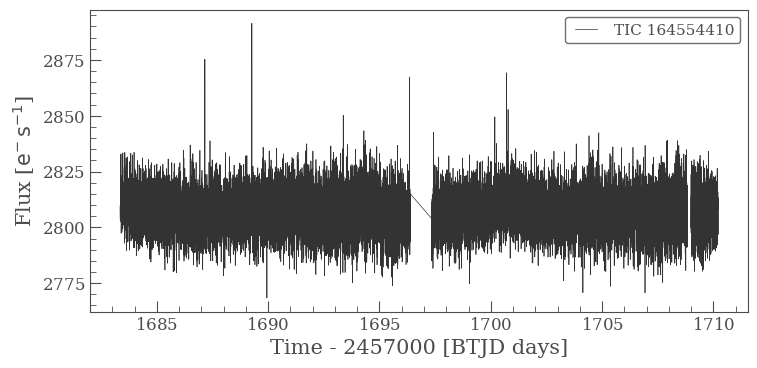

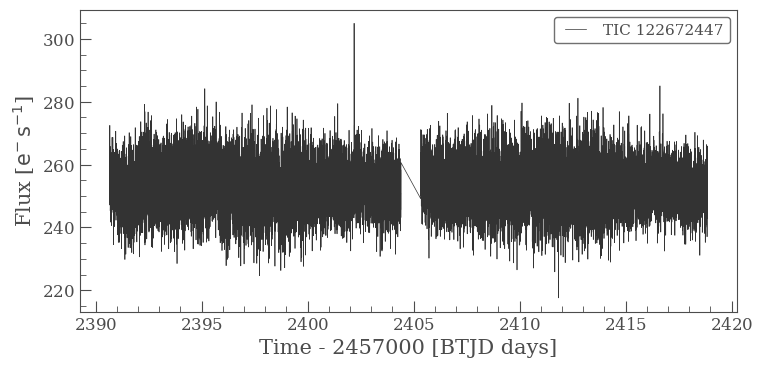

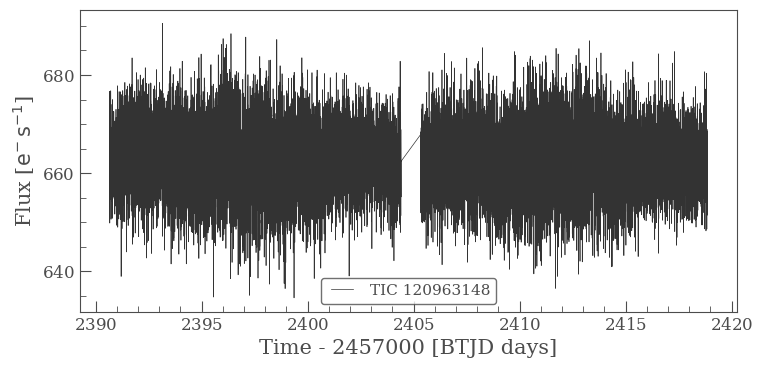

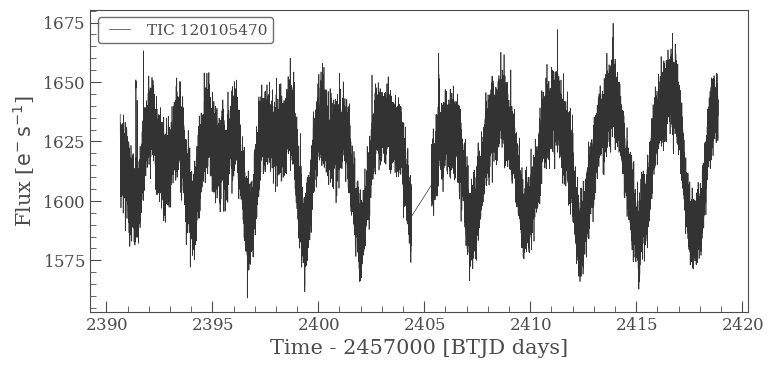

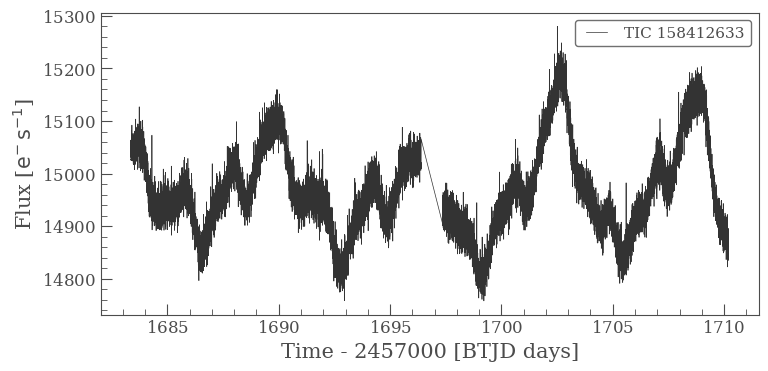

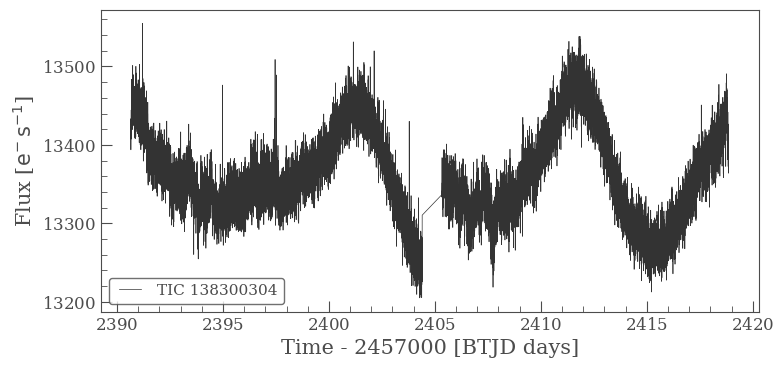

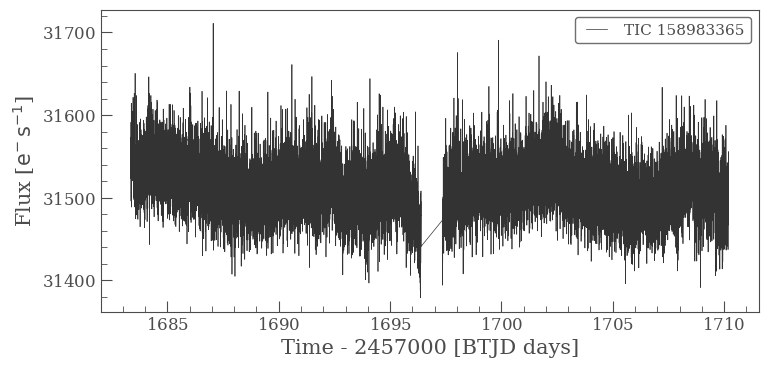

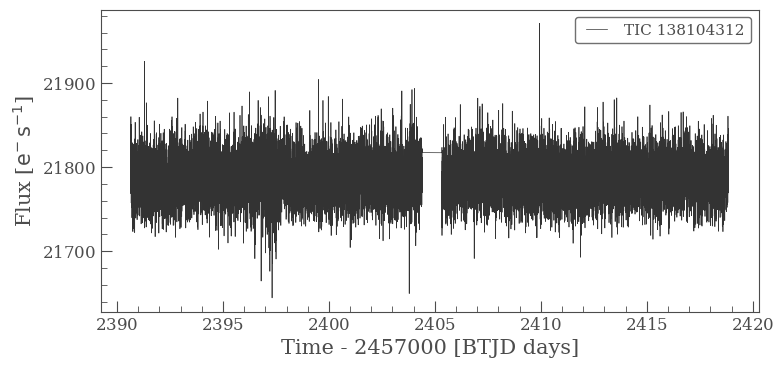

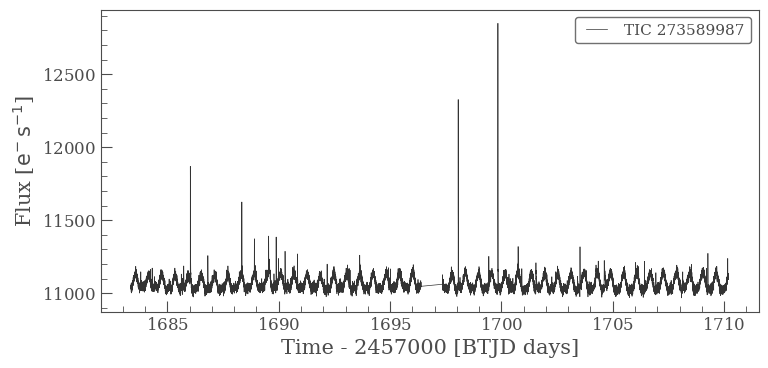

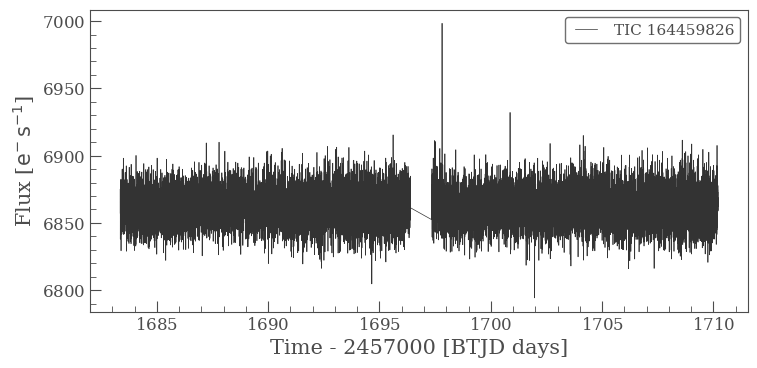

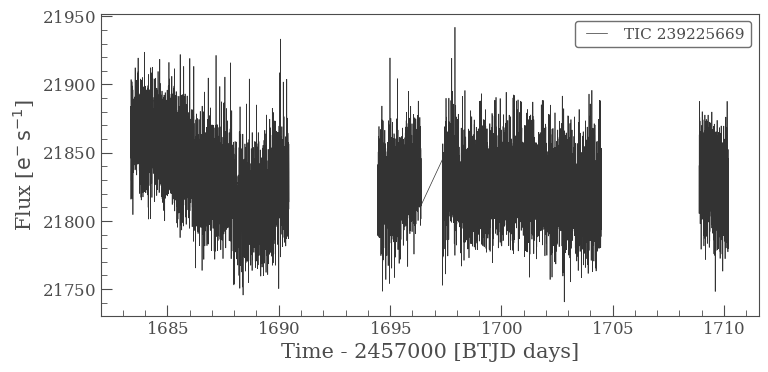

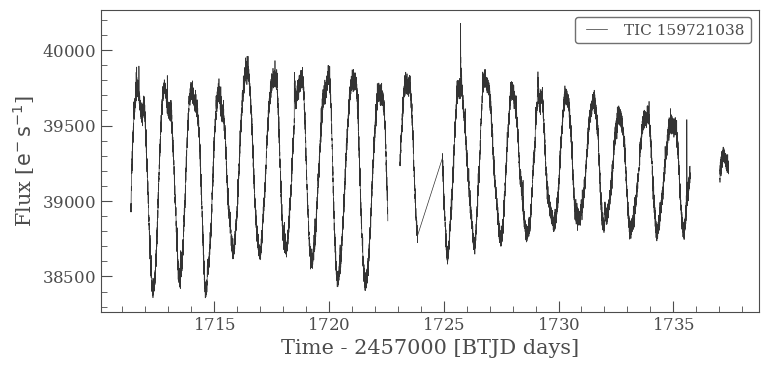

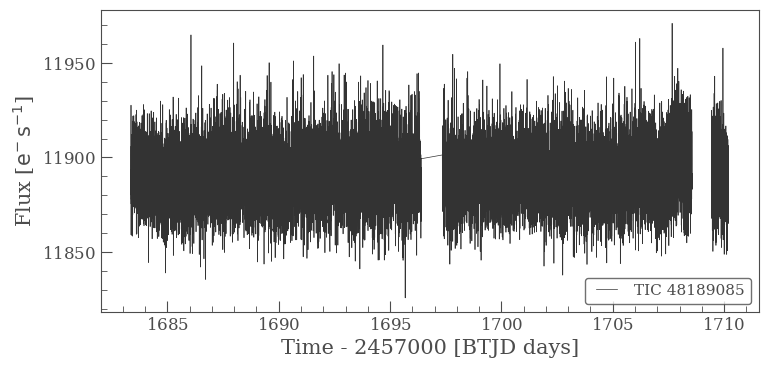

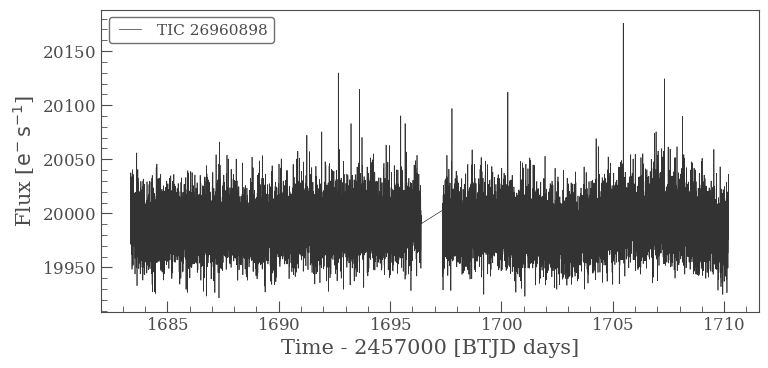

In [169]:
# lets just pull the LCs to double check we have some flare stars here...
# grab the 1st LC for each star in this sample
for k in range(len(FS)):    
    lc = lk.search_lightcurve('TIC'+str(int(FS['TIC'].values[k])), mission='TESS', exptime=120)[0].download()
    lc.plot()

In [ ]:
# yeah.... i dont like this sample as much as Spencer's. Let's start with that!